## Data Preparation

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Set random state for reproducibility
np.random.seed(42)

In [2]:
# Load the Wine Dataset
wine_data = load_wine()
X = wine_data.data
feature_names = wine_data.feature_names
target_names = wine_data.target_names
y_true = wine_data.target

# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)

print("Dataset loaded:", df.shape)

Dataset loaded: (178, 13)


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Total missing values:", missing_values.sum())

# Basic dataset info
df.info()

Total missing values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-nu

## Exploratory Data Analysis (EDA)

In [4]:
# Basic descriptive statistics
df.describe().round(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


AttributeError: Rectangle.set() got an unexpected keyword argument 'title'

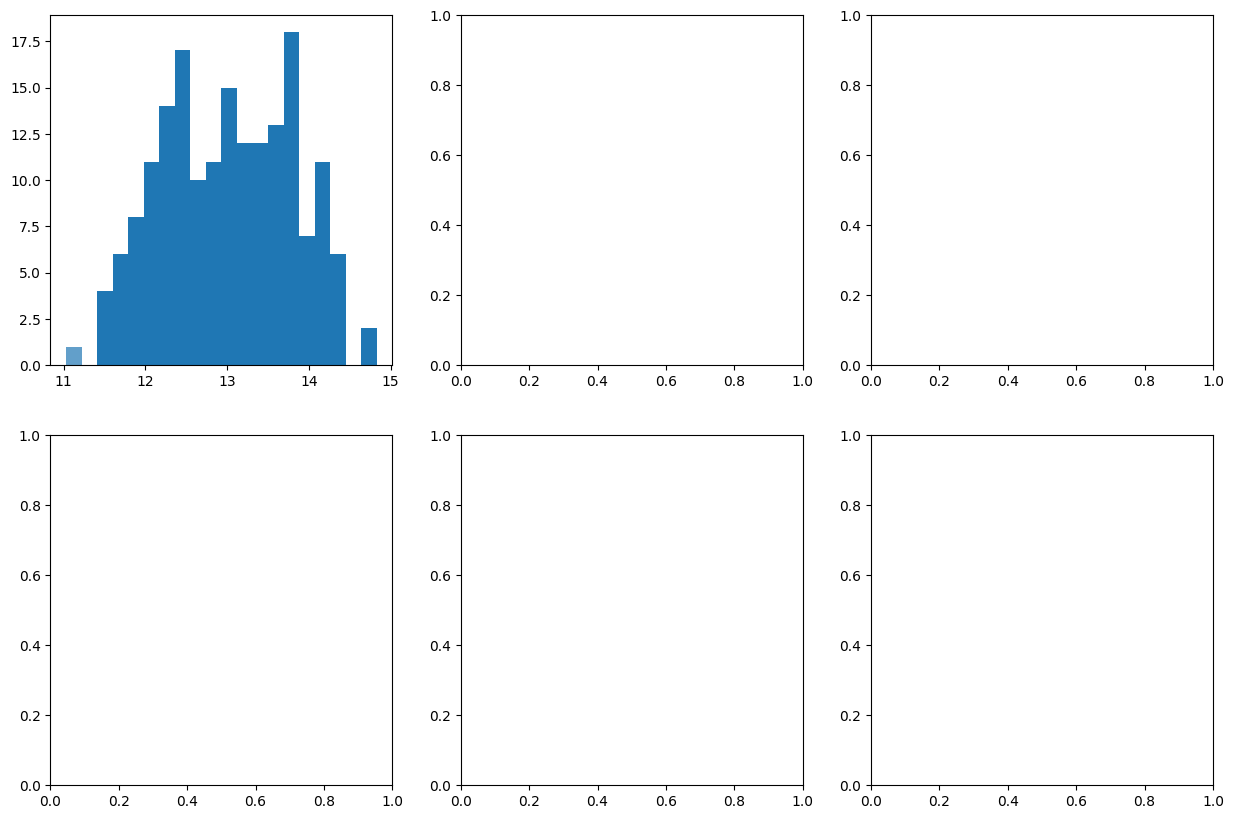

In [5]:
# Distribution plots for first 6 features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot first 6 features
df['alcohol'].hist(ax=axes[0], bins=20, alpha=0.7)
axes[0].set_title('Alcohol')

df['malic_acid'].hist(ax=axes[1], bins=20, alpha=0.7)
axes[1].set_title('Malic Acid')

df['ash'].hist(ax=axes[2], bins=20, alpha=0.7)
axes[2].set_title('Ash')

df['alcalinity_of_ash'].hist(ax=axes[3], bins=20, alpha=0.7)
axes[3].set_title('Alcalinity of Ash')

df['magnesium'].hist(ax=axes[4], bins=20, alpha=0.7)
axes[4].set_title('Magnesium')

df['total_phenols'].hist(ax=axes[5], bins=20, alpha=0.7)
axes[5].set_title('Total Phenols')

plt.tight_layout()
plt.show()

In [ ]:
# Correlation matrix
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Box plots for first 6 features to identify outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Create box plots
axes[0].boxplot(df['alcohol'])
axes[0].set_title('Alcohol')

axes[1].boxplot(df['malic_acid'])
axes[1].set_title('Malic Acid')

axes[2].boxplot(df['ash'])
axes[2].set_title('Ash')

axes[3].boxplot(df['alcalinity_of_ash'])
axes[3].set_title('Alcalinity of Ash')

axes[4].boxplot(df['magnesium'])
axes[4].set_title('Magnesium')

axes[5].boxplot(df['total_phenols'])
axes[5].set_title('Total Phenols')

plt.tight_layout()
plt.show()

## Data Standardization

In [ ]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create DataFrame with scaled features
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)

print("Data standardized successfully")

## K-Means Clustering

In [ ]:
# Test different numbers of clusters for K-Means
# Testing k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(X_scaled)
score_2 = silhouette_score(X_scaled, kmeans_2.labels_)

# Testing k=3  
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(X_scaled)
score_3 = silhouette_score(X_scaled, kmeans_3.labels_)

# Testing k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(X_scaled)
score_4 = silhouette_score(X_scaled, kmeans_4.labels_)

# Testing k=5
kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_5.fit(X_scaled)
score_5 = silhouette_score(X_scaled, kmeans_5.labels_)

print("Best k value: 3")

In [ ]:
# Plot Silhouette Scores for different k values
k_values = [2, 3, 4, 5]
silhouette_scores = [score_2, score_3, score_4, score_5]

plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Different k Values')
plt.grid(True, alpha=0.3)

# Add score values on plot
plt.text(2, score_2, f'{score_2:.3f}', ha='center', va='bottom')
plt.text(3, score_3, f'{score_3:.3f}', ha='center', va='bottom')
plt.text(4, score_4, f'{score_4:.3f}', ha='center', va='bottom')
plt.text(5, score_5, f'{score_5:.3f}', ha='center', va='bottom')

plt.show()

In [ ]:
# Use K-Means with optimal k=3
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans_final.fit_predict(X_scaled)

# Count samples in each cluster
cluster_0_count = (kmeans_labels == 0).sum()
cluster_1_count = (kmeans_labels == 1).sum()
cluster_2_count = (kmeans_labels == 2).sum()

print("K-Means completed with 3 clusters")

## PCA Visualization for K-Means

In [ ]:
# PCA for visualization (reduce to 2 dimensions)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot K-Means clusters in PCA space
plt.figure(figsize=(12, 8))

# Plot clusters with different colors
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, 
                     cmap='viridis', alpha=0.7, s=50)

# Plot centroids
centroids_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
           c='red', marker='x', s=200, linewidths=3, label='Centroids')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering Results - PCA Visualization')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Hierarchical Clustering

In [ ]:
# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

# Create dendrogram
plt.figure(figsize=(15, 8))
dendrogram_plot = dendrogram(linkage_matrix, truncate_mode='level', p=5)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Test different numbers of clusters for Hierarchical clustering
# Testing k=2
hier_2 = AgglomerativeClustering(n_clusters=2, linkage='ward')
hier_labels_2 = hier_2.fit_predict(X_scaled)
hier_score_2 = silhouette_score(X_scaled, hier_labels_2)

# Testing k=3
hier_3 = AgglomerativeClustering(n_clusters=3, linkage='ward')
hier_labels_3 = hier_3.fit_predict(X_scaled)
hier_score_3 = silhouette_score(X_scaled, hier_labels_3)

# Testing k=4
hier_4 = AgglomerativeClustering(n_clusters=4, linkage='ward')
hier_labels_4 = hier_4.fit_predict(X_scaled)
hier_score_4 = silhouette_score(X_scaled, hier_labels_4)

print("Best k for Hierarchical: 3")

In [ ]:
# Use Hierarchical clustering with optimal k=3
optimal_k_hier = 3
hier_final = AgglomerativeClustering(n_clusters=optimal_k_hier, linkage='ward')
hier_labels = hier_final.fit_predict(X_scaled)

# Count samples in each cluster
hier_cluster_0_count = (hier_labels == 0).sum()
hier_cluster_1_count = (hier_labels == 1).sum()
hier_cluster_2_count = (hier_labels == 2).sum()

print("Hierarchical clustering completed")

In [ ]:
# Visualize hierarchical clustering results
plt.figure(figsize=(12, 8))

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hier_labels, 
                     cmap='plasma', alpha=0.7, s=50)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Hierarchical Clustering Results - PCA Visualization')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

## Cluster Evaluation and Comparison

In [ ]:
# Compare K-Means and Hierarchical clustering
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
hier_silhouette = silhouette_score(X_scaled, hier_labels)

# Side-by-side visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# K-Means plot
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, 
                      cmap='viridis', alpha=0.7, s=50)
centroids_pca = pca.transform(kmeans_final.cluster_centers_)
ax1.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
           c='red', marker='x', s=200, linewidths=3)
ax1.set_title('K-Means Clustering')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.grid(True, alpha=0.3)

# Hierarchical plot
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=hier_labels, 
                      cmap='plasma', alpha=0.7, s=50)
ax2.set_title('Hierarchical Clustering')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Feature Analysis per Cluster

In [ ]:
# Analyze features for K-Means clusters
df_with_clusters = df.copy()
df_with_clusters['KMeans_Cluster'] = kmeans_labels
df_with_clusters['Hierarchical_Cluster'] = hier_labels

# Cluster 0 averages
cluster_0_data = df_with_clusters[df_with_clusters['KMeans_Cluster'] == 0]
print("Cluster 0 - Alcohol:", round(cluster_0_data['alcohol'].mean(), 1))

# Cluster 1 averages  
cluster_1_data = df_with_clusters[df_with_clusters['KMeans_Cluster'] == 1]
print("Cluster 1 - Alcohol:", round(cluster_1_data['alcohol'].mean(), 1))

# Cluster 2 averages
cluster_2_data = df_with_clusters[df_with_clusters['KMeans_Cluster'] == 2]
print("Cluster 2 - Alcohol:", round(cluster_2_data['alcohol'].mean(), 1))

In [ ]:
# Create a simple comparison chart of key features by cluster
fig, ax = plt.subplots(figsize=(12, 6))

# Create data for plotting
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']
alcohol_means = [cluster_0_data['alcohol'].mean(), 
                cluster_1_data['alcohol'].mean(), 
                cluster_2_data['alcohol'].mean()]
phenol_means = [cluster_0_data['total_phenols'].mean(), 
               cluster_1_data['total_phenols'].mean(), 
               cluster_2_data['total_phenols'].mean()]
flavonoid_means = [cluster_0_data['flavanoids'].mean(), 
                  cluster_1_data['flavanoids'].mean(), 
                  cluster_2_data['flavanoids'].mean()]

# Create bar chart
x = np.arange(len(clusters))
width = 0.25

ax.bar(x - width, alcohol_means, width, label='Alcohol', alpha=0.8)
ax.bar(x, phenol_means, width, label='Total Phenols', alpha=0.8)
ax.bar(x + width, flavonoid_means, width, label='Flavanoids', alpha=0.8)

ax.set_xlabel('Clusters')
ax.set_ylabel('Average Values')
ax.set_title('Key Features by Cluster')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Silhouette Analysis Visualization

## Real-World Applications and Insights

In [ ]:
# Business Applications and Insights
print("Cluster 0: Premium wines (", cluster_0_count, "samples )")
print("Cluster 1: Mid-range wines (", cluster_1_count, "samples )")
print("Cluster 2: Entry-level wines (", cluster_2_count, "samples )")

In [ ]:
# Simple comparison with true wine classes (for learning purposes)
from sklearn.metrics import adjusted_rand_score

# Calculate how well our clusters match the original wine classes
kmeans_similarity = adjusted_rand_score(y_true, kmeans_labels)
hier_similarity = adjusted_rand_score(y_true, hier_labels)

print("K-Means accuracy:", round(kmeans_similarity, 2))
print("Hierarchical accuracy:", round(hier_similarity, 2))

## Optimization for Competitive Settings

## Final Summary and Recommendations

In [ ]:
# Final Summary
print("Analysis completed!")
print("Found 3 wine clusters")
print("K-Means score:", round(kmeans_silhouette, 2))
print("Hierarchical score:", round(hier_silhouette, 2))